In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
data=pd.read_csv('Cust_Spend_Data.csv')

In [3]:
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
data_attr=data.iloc[:,2:]

In [5]:
data_attr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [6]:
data_attr_scaled=data_attr.apply(zscore)

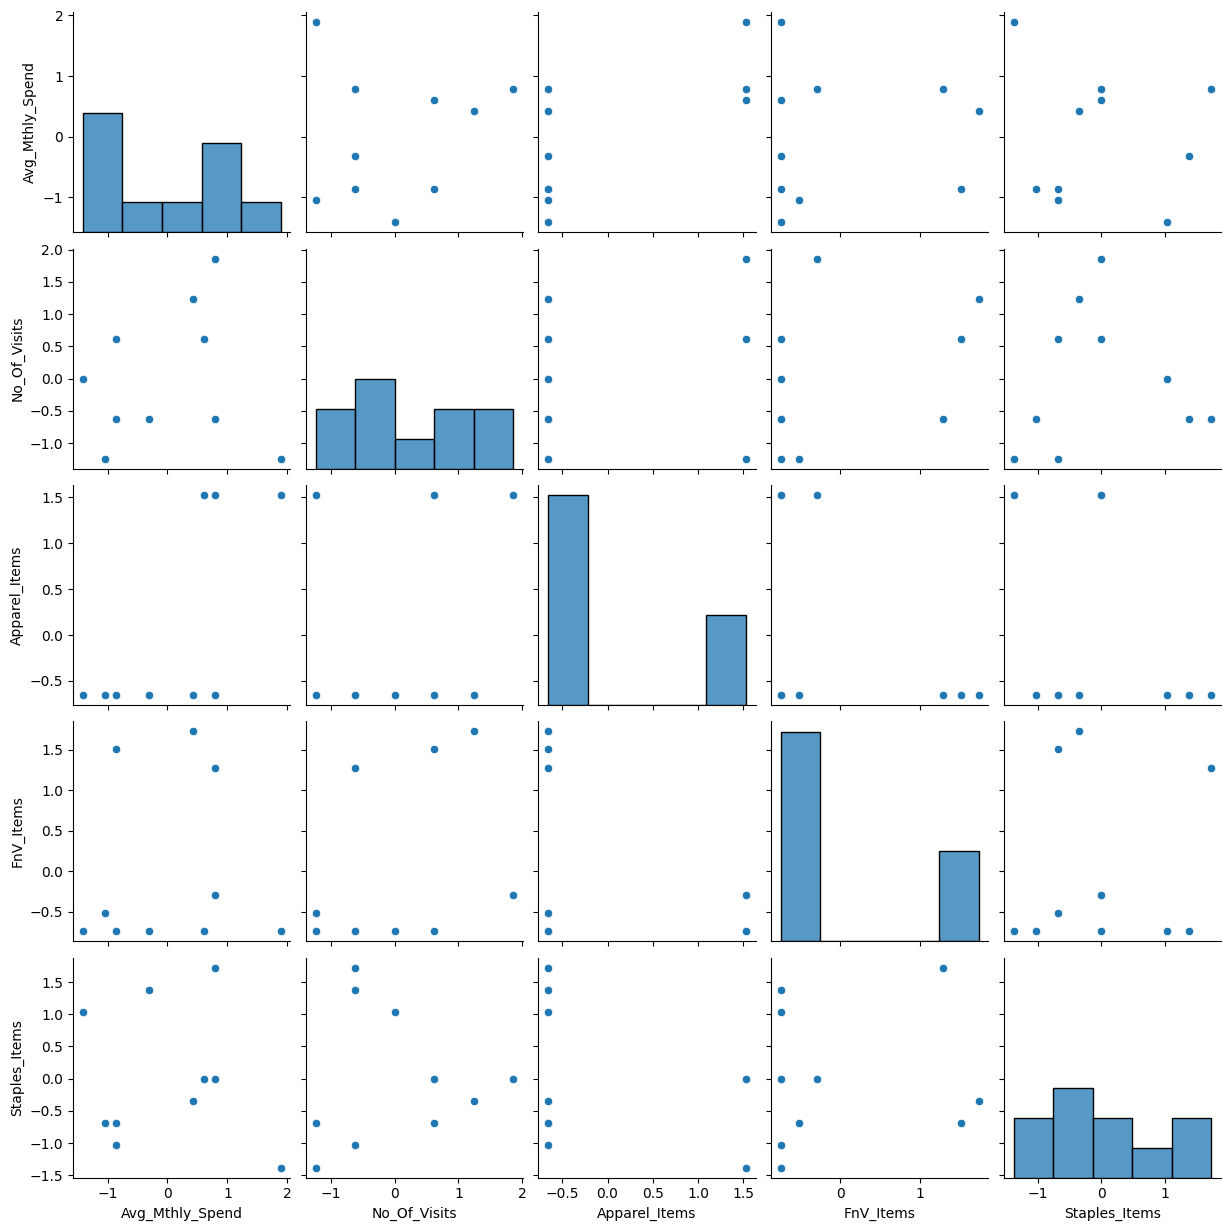

In [7]:
sns.pairplot(data_attr_scaled)

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model=AgglomerativeClustering(n_clusters=3,linkage='average') 

In [12]:
model.fit(data_attr_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [13]:
data_attr_scaled['labels']=model.labels_

In [14]:
data_attr_scaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131,0
1,0.787567,-0.620174,-0.654654,1.280656,1.725164,1
2,0.787567,1.860521,1.527525,-0.292080,0.000000,0
3,0.604412,0.620174,1.527525,-0.741433,0.000000,0
4,0.421257,1.240347,-0.654654,1.730009,-0.345033,1


In [15]:
data_attr['labels']=model.labels_

In [18]:
data_clustered=data_attr.groupby(['labels'])

In [19]:
data_clustered.mean() 

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [20]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [23]:
from scipy.spatial.distance import pdist

In [24]:
z=linkage(data_attr_scaled,metric='euclidean',method='average')

In [25]:
#cophenet index----- is measure of correlation between the distance of points
c,cop_dist=cophenet(z,pdist(data_attr_scaled))

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25]],
 'dcoord': [[0.0,
   np.float64(1.3318879651023692),
   np.float64(1.3318879651023692),
   0.0],
  [0.0,
   np.float64(3.121719909956024),
   np.float64(3.121719909956024),
   np.float64(1.3318879651023692)],
  [0.0, np.float64(0.7666083416231964), np.float64(0.7666083416231964), 0.0],
  [0.0, np.float64(1.308171030020069), np.float64(1.308171030020069), 0.0],
  [np.float64(0.7666083416231964),
   np.float64(2.2918796220243403),
   np.float64(2.2918796220243403),
   np.float64(1.308171030020069)],
  [0.0, np.float64(1.4825269878175196), np.float64(1.4825269878175196), 0.0],
  [0.0,
   np.float64(3.0136897802815246),
   np.float64(3.0136897802815246),
   np.float64(1.4825269878175196)],
  [np.float64(2.2918796220243403),
   np.f

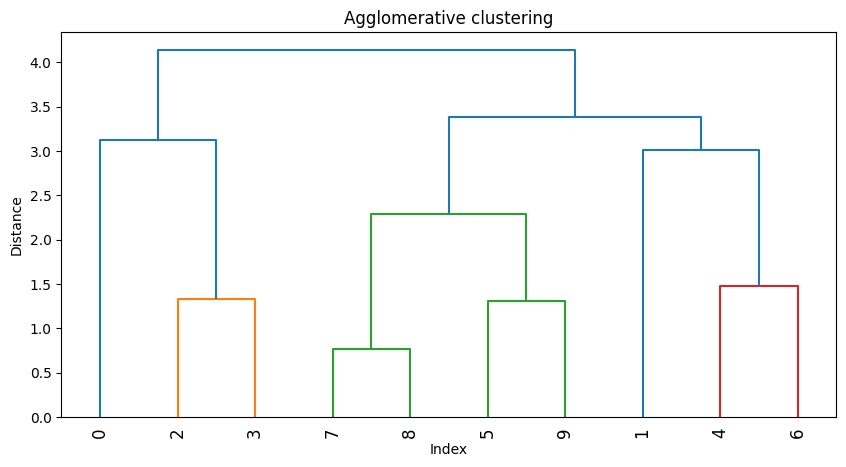

In [26]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative clustering")
plt.xlabel("Index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation=90.)